### Here I will find out how to generate a clipped track pedestrian df.
#### And visualize it

### first say where the data is

In [1]:
dataDir = "/Users/zarifikram/Documents/Repos/drone-dataset-tools/data/ind"

##### this line calls necessary codes to locate the file structure 

In [2]:
exec(open('init_notebook.py').read())

current working dir/Users/zarifikram/Documents/Repos/drone-dataset-tools/src


In [3]:
%load_ext autoreload
%autoreload 2

##### now we get loader (this loads the data, and gives important getters)
##### Trajectory visualizer visualizes the pedestrian tracks

In [4]:
from extractors.loader import Loader
from tools.TrajectoryVisualizer import TrajectoryVisualizer

##### loader takes `dataDirectory` and `datasetName`
`getRecordingData()` takes `recordingId` and returns `Recording` Object
`getSortedPedIds()` takes `TrackMetaDf` and returns a series of `pedId`s
`TrackMetaDf` is the basic info (class, length, width, etc.) for all different actors in a recording

In [5]:
loader = Loader(dataDir, 'inD')
recordingId = '19'
recordingData = loader.getRecordingData(recordingId)
loader.getSortedPedIds(recordingData.tracksMetaDf)

downsampling: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492008/492008 [00:10<00:00, 45440.20it/s]


SortedList([2, 17, 19, 20, 26, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 45, 47, 49, 53, 55, 56, 57, 59, 60, 63, 70, 71, 72, 74, 75, 81, 86, 88, 90, 93, 94, 96, 103, 110, 112, 117, 121, 125, 132, 133, 135, 140, 147, 149, 150, 153, 157, 158, 160, 161, 163, 167, 168, 177, 178, 180, 187, 188, 194, 197, 198, 199, 203, 204, 205, 211, 212, 214, 219, 222, 224, 225, 232, 233, 235, 236, 238, 240, 242, 243, 244, 247, 249, 264, 265, 267, 274, 275, 281, 282, 283, 288, 289, 291, 293, 295, 296, 302, 304, 312, 320, 327, 331, 335, 337, 338, 339, 340, 341, 343, 346, 349, 352, 353, 356, 362, 365])

##### This is something that was supposed to work. But, API does not have `getCrossingPedIds()` anymore 

In [7]:
visualizer = TrajectoryVisualizer(loader)
for pedId in recordingData.getCrossingPedIds():
    visualizer.showTrack(recordingData.tracksDf, recordingData.recordingMeta, pedId)


AttributeError: 'RecordingData' object has no attribute 'getCrossingPedIds'

### let's instead try to visualize

##### `TrajectoryVisualizer` takes a `Loader` to visualize anything

In [8]:
visualizer = TrajectoryVisualizer(loader)


##### To visualize a track (aka trajectory) call `showTrack`
it takes a `TracksDf`, `RecordingMeta`, and `Id` of the track you wanna see

###### <i>Why Recording Meta though </i>
we need to translate Meter --> Pixels, and of course, know what is the background

2023-04-10 23:37:35.686 | INFO     | tools.TrajectoryVisualizer:initPlot:33 - Loading background image from /Users/zarifikram/Documents/Repos/drone-dataset-tools/data/ind/19_background.png


,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration,uniqueTrackId
364460,19,100,6092,0,93.6726,-19.69176,191.6069,0.0,0.0,-7.14278,-1.44548,-0.062,-0.10031,7.28754,0.02117,0.08092,-0.08578,19100
364465,19,100,6097,5,92.23717,-19.98402,191.61891,0.0,0.0,-7.16956,-1.472,-0.00276,-0.08644,7.31911,0.00212,0.02012,-0.08411,19100
364470,19,100,6102,10,90.7974,-20.28131,191.63227,0.0,0.0,-7.16876,-1.49204,0.10666,-0.04718,7.32237,-0.01597,-0.09496,-0.06771,19100
364475,19,100,6107,15,89.36249,-20.58201,191.64272,0.0,0.0,-7.1352,-1.50039,0.22343,0.00999,7.29119,-0.02958,-0.22085,-0.03531,19100
364480,19,100,6112,20,87.94052,-20.88442,191.64648,0.0,0.0,-7.07613,-1.4923,0.32004,0.07275,7.2317,-0.0331,-0.32813,0.00664,19100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364920,19,100,6552,460,22.56064,-34.25019,195.13456,0.0,0.0,-8.80994,-2.23214,-0.8199,-0.29091,9.08716,0.14544,0.86742,-0.06676,19100
364925,19,100,6557,465,20.77955,-34.70325,195.02009,0.0,0.0,-8.97063,-2.30037,-0.70766,-0.33252,9.26031,0.10303,0.76966,-0.13776,19100
364930,19,100,6562,470,18.96506,-35.17214,194.91416,0.0,0.0,-9.09669,-2.37268,-0.59389,-0.35269,9.4009,0.04848,0.66466,-0.18796,19100
364935,19,100,6567,475,17.13352,-35.65474,194.81379,0.0,0.0,-9.19476,-2.44592,-0.52411,-0.36176,9.51451,-0.01372,0.59919,-0.21573,19100


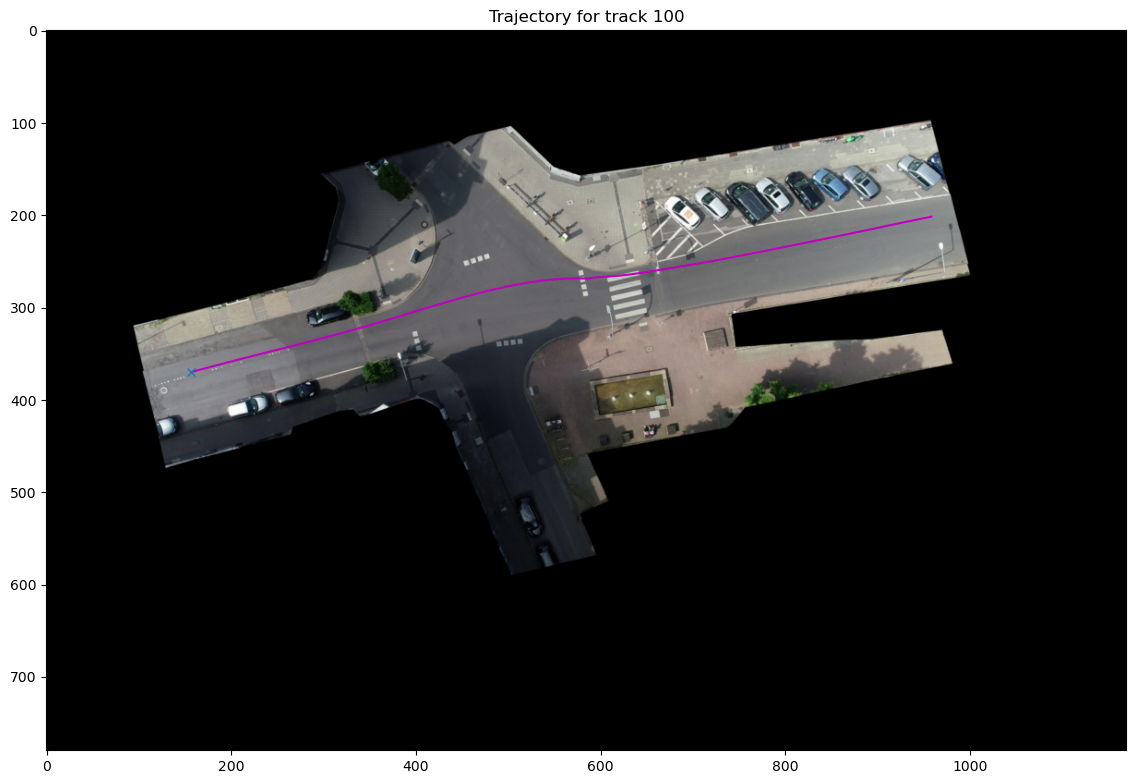

In [ ]:
visualizer.showTrack(recordingData.tracksDf, recordingData.recordingMeta, 100)

# Next Exploration : `LocationData` 

##### `Loader` itself is supposed to give you `LocationData` 
just called `getLocationData()`

##### it takes `locationId` (1-4), `sceneConfig` (sth i am yet to understand), `preComputeSceneData` (if true, does the clipping), `recordingIds` (list of recordingIDs we wanna take) (if not specified, takes all recordingIds for the locaiton)

In [39]:
loader.getLocationData(locationId=4, useSceneConfigToExtract=False, precomputeSceneData=False, recordingIds=[7])

downsampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 201296/201296 [00:04<00:00, 44575.14it/s]


downsampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 205275/205275 [00:04<00:00, 43224.54it/s]
2023-04-11 00:25:54.067 | INFO     | tools.TrajectoryVisualizer:initPlot:33 - Loading background image from /Users/zarifikram/Documents/Repos/drone-dataset-tools/data/ind/00_background.png


,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration,uniqueTrackId
60869,0,41,3057,0,50.32384,-92.5903,33.28875,0.0,0.0,1.57008,1.0722,0.09252,-0.03621,1.90094,-0.03451,0.05747,0.08105,41
60874,0,41,3062,5,50.63863,-92.37593,33.14994,0.0,0.0,1.59436,1.06852,0.08565,-0.0558,1.91917,-0.02277,0.0412,0.09355,41
60879,0,41,3067,10,50.95898,-92.16199,32.9202,0.0,0.0,1.61801,1.05798,0.04821,-0.09243,1.93318,-0.00876,-0.00976,0.10379,41
60884,0,41,3072,15,51.29023,-91.95039,32.62377,0.0,0.0,1.6253,1.03616,-0.0178,-0.13652,1.92748,0.00355,-0.08859,0.10539,41
60889,0,41,3077,20,51.61965,-91.7437,32.28511,0.0,0.0,1.60639,1.00086,-0.06618,-0.17152,1.89264,0.0119,-0.14756,0.10965,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,0,41,3657,600,84.39001,-65.94623,74.68097,0.0,0.0,0.42107,1.53682,-0.59618,-0.00112,1.59346,0.00009,-0.15859,-0.5747,41
61474,0,41,3662,605,84.45992,-65.63804,77.78326,0.0,0.0,0.30136,1.53633,-0.605,0.00622,1.56531,-0.03057,-0.12194,-0.59262,41
61479,0,41,3667,610,84.50996,-65.33121,80.92515,0.0,0.0,0.17892,1.53756,-0.61667,0.01789,1.54654,-0.06583,-0.0796,-0.61177,41
61484,0,41,3672,615,84.53409,-65.02444,84.08206,0.0,0.0,0.05246,1.54367,-0.62201,0.02822,1.54085,-0.10698,-0.03606,-0.6216,41


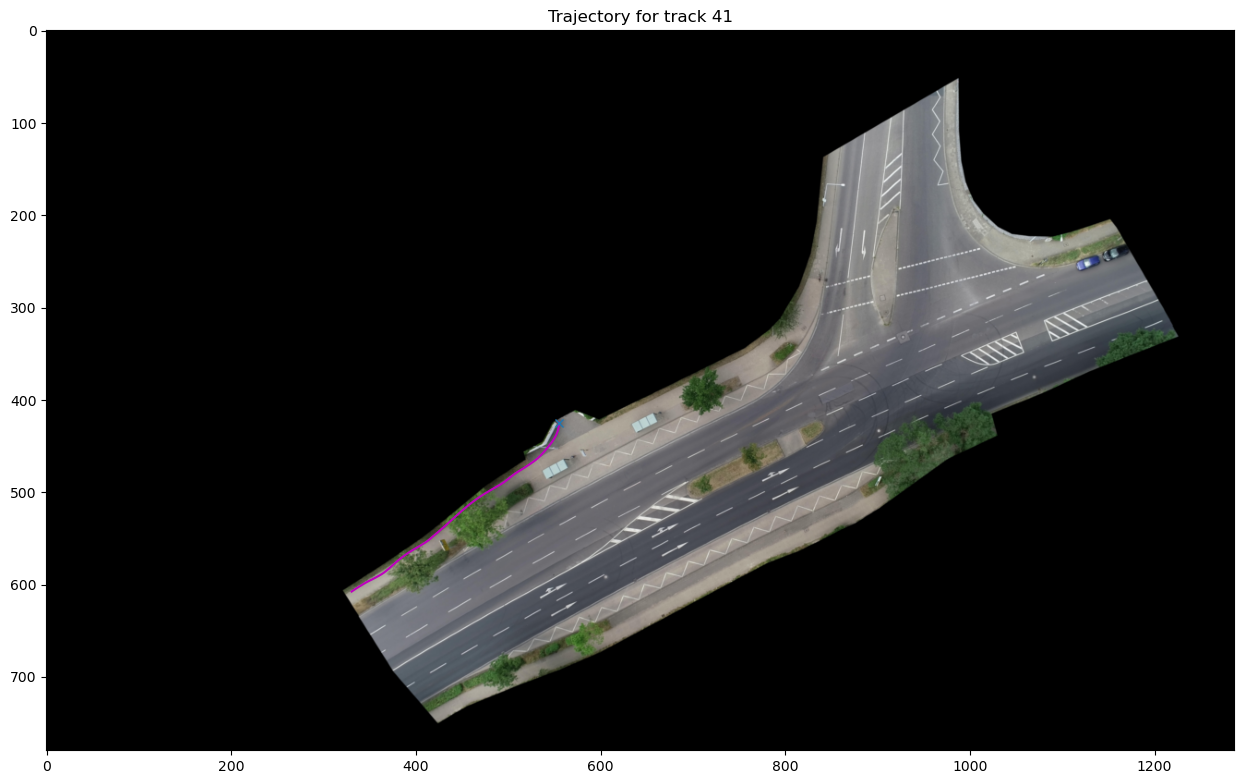

In [42]:
rec = loader.getRecordingData(0)

2023-04-11 00:39:00.899 | INFO     | tools.TrajectoryVisualizer:initPlot:33 - Loading background image from /Users/zarifikram/Documents/Repos/drone-dataset-tools/data/ind/00_background.png


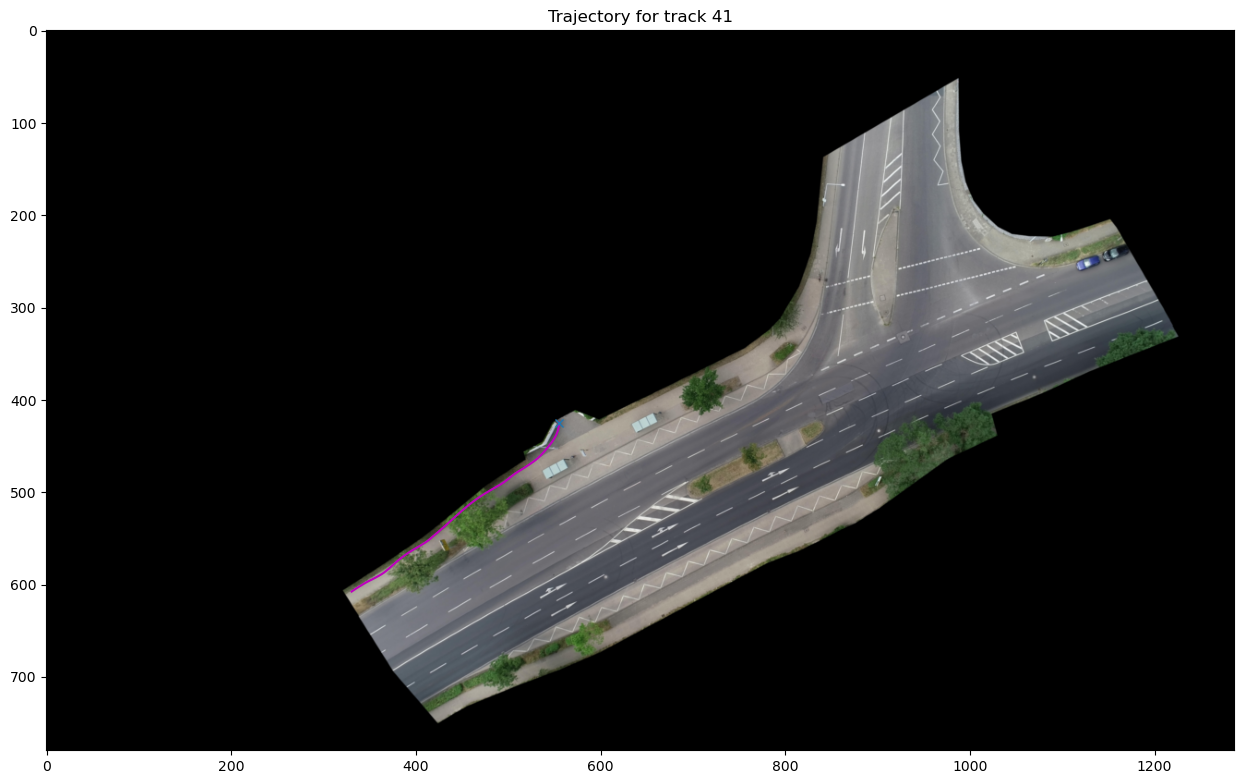

In [57]:
peddf = visualizer.showTrack(rec.tracksDf, rec.recordingMeta, 41)

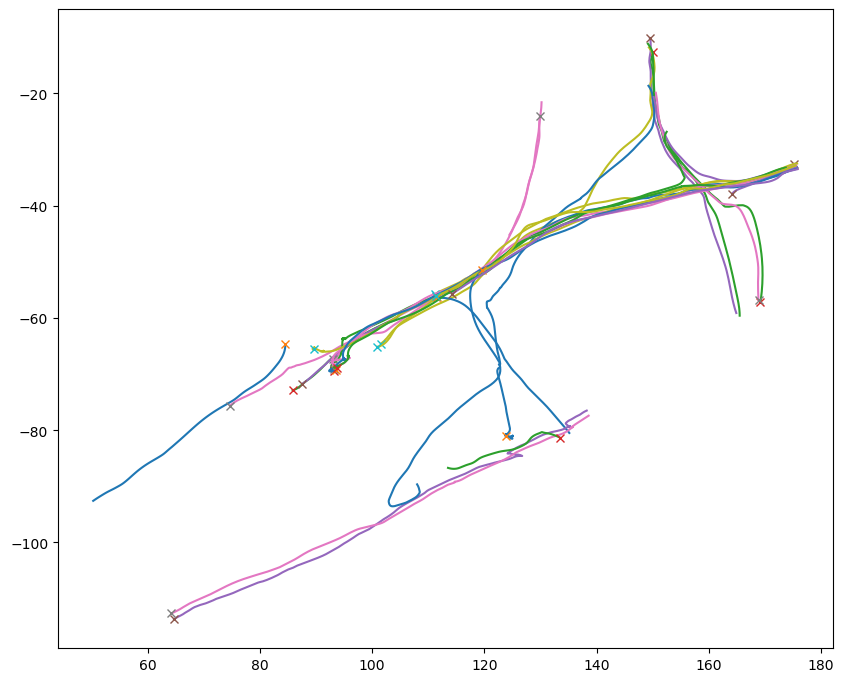

In [56]:
# pedDfs = rec.getPedDf()
visualizer.showLocalTrajectories(pedDfs, "trackId", "xCenter", "yCenter")

<IntegerArray>
[ 41,  83,  84,  98, 137, 138, 139, 141, 142, 184, 185, 199, 200, 247, 258,
 265, 291, 297, 315, 329, 331, 333, 336, 338, 351, 357, 358, 369, 378]
Length: 29, dtype: Int64